In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Chapter 5**

**5.6. Testing the solution to the gambler’s ruin**

Sample 10,000 paths of Brownian paths with drift $\mu = 1$ and volatility $\sigma = 1$ on $[0,5]$ for a step size of $0.01$:

$$X_t = \sigma B_t + \mu t $$

In [10]:
def brownian_drift(t_initial, t_final, step_size, mu=1, sigma=1):
    time = np.arange(t_initial, t_final+step_size, step_size)

    # number of points
    n = len(time) - 1

    # initialize n Gaussian random variables with mean 0 and variance dt
    # each of the elements in the array represents B_tj - B_(tj-1)
    dB = np.random.normal(0,np.sqrt(step_size),n)

    # array of brownian motion with drift 
    brownian_motion = np.concatenate(([0],np.cumsum(dB)))

    brownian_motion = sigma*brownian_motion

    brownian_motion_drift =  brownian_motion + mu*time

    return time, brownian_motion, brownian_motion_drift

Text(0.5, 1.0, 'Brownian Motion without drift')

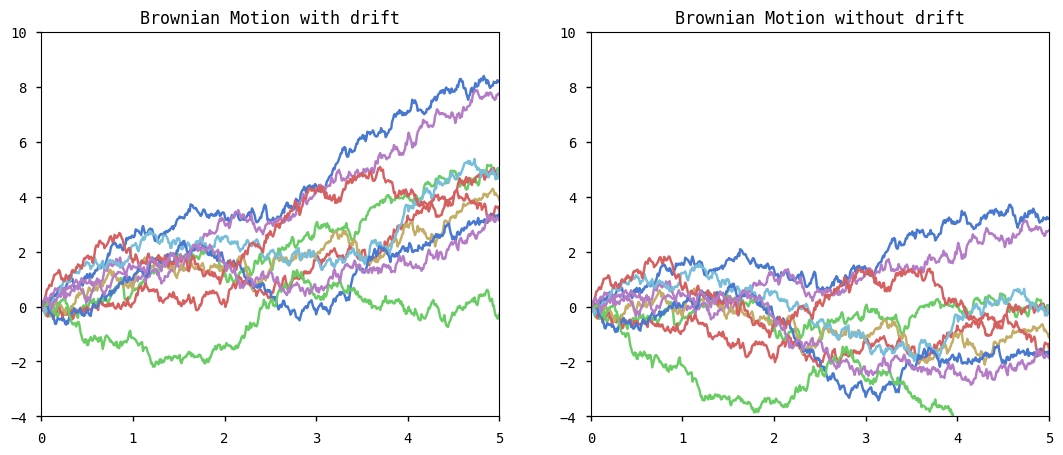

In [51]:
figure, axis = plt.subplots(1, 2, figsize=(13,13)) 
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['font.family'] = 'monospace'

for i in range(10):
    time, brownian_motion, brownian_motion_drift = brownian_drift(0,5,0.01)
    axis[0].plot(time, brownian_motion_drift)
    axis[1].plot(time, brownian_motion)

axis[0].set(xlim=[0, 5], ylim=[-4, 10], aspect=0.3)
axis[0].set_title('Brownian Motion with drift')
axis[1].set(xlim=[0, 5], ylim=[-4, 10], aspect=0.3)
axis[1].set_title('Brownian Motion without drift')

Count the proportion of those paths that reach −1 on the time interval and
compare with equation (5.29). Repeat the experiment for a step size of 0.001

In [73]:
count = 0
for i in range(10000):
    time, brownian_motion, brownian_motion_drift = brownian_drift(0,5,0.01)
    #print(brownian_motion_drift)
    if np.any(brownian_motion_drift, where=brownian_motion_drift<-1):
        count += 1

print('Proporsi path yang "menyentuh" -1 sebesar {:.3f}'.format(count/10000))

Proporsi path yang "menyentuh" -1 sebesar 0.120


Secara teoritis menurut persamaan (5.29), peluang tersebut akan mendekati
$$P(X_\tau = -1) \rightarrow e^{\frac{-2\mu}{\sigma^2}b} = e^{-2} \approx 0.135$$

In [75]:
count = 0
for i in range(10000):
    time, brownian_motion, brownian_motion_drift = brownian_drift(0,5,0.001)
    #print(brownian_motion_drift)
    if np.any(brownian_motion_drift, where=brownian_motion_drift<-1):
        count += 1

print('Proporsi path yang "menyentuh" -1 sebesar {:.3f}'.format(count/10000))

Proporsi path yang "menyentuh" -1 sebesar 0.126


### **Chapter 4**

Sample 10 paths of the following processes with a stepsize of 0.01:

a) $B_t^2-t,\space t\in[0,1]$

In [41]:
def martingale1(t_initial, t_final, step_size):
    time = np.arange(t_initial, t_final+step_size, step_size)

    # number of points
    n = len(time) - 1

    # initialize n Gaussian random variables with mean 0 and variance dt
    # each of the elements in the array represents B_tj - B_(tj-1)
    dB = np.random.normal(0,np.sqrt(step_size),n)

    # array of brownian motion Bt
    brownian_motion = np.concatenate(([0],np.cumsum(dB)))

    martingale =  np.square(brownian_motion) - time

    return time, martingale 


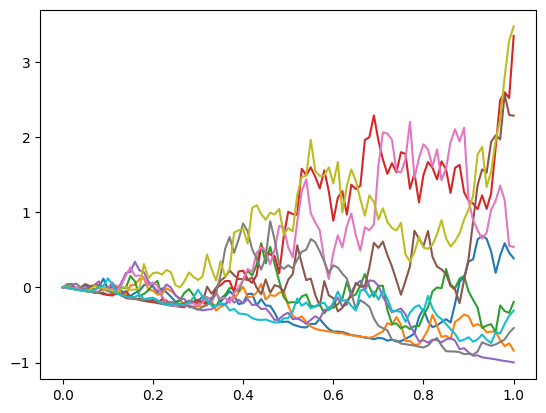

In [42]:
for i in range(10):
    time, martingale= martingale1(0,1,0.01)
    plt.plot(time,martingale)

b) Geometric Brownian motion: $S_t=\exp(B_t - t/2), \space t\in [0,1]$

In [39]:
def martingale2(t_initial, t_final, step_size):
    time = np.arange(t_initial, t_final+step_size, step_size)

    # number of points
    n = len(time) - 1

    # initialize n Gaussian random variables with mean 0 and variance dt
    # each of the elements in the array represents B_tj - B_(tj-1)
    dB = np.random.normal(0,np.sqrt(step_size),n)

    # array of brownian motion Bt
    brownian_motion = np.concatenate(([0],np.cumsum(dB)))

    martingale =  np.exp(brownian_motion - 1/2*time)

    return time, martingale

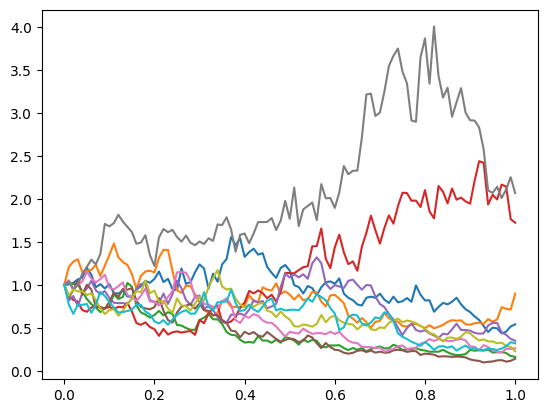

In [40]:
for i in range(10):
    time, martingale= martingale2(0,1,0.01)
    plt.plot(time,martingale)

c) Compensated Poisson process: $N_t-t,\space t\in[0,10]$ 

In [43]:
def martingale3(t_initial, t_final, step_size):
    time = np.arange(t_initial, t_final+step_size, step_size)

    # number of points
    n = len(time) - 1

    # initialize n Poisson random variables with parameter lambda(t-s)
    # each of the elements in the array represents N_tj - N_(tj-1)
    dN = np.random.poisson(lam=1*step_size, size=n)

    # array of Poisson process Nt
    poisson_process = np.concatenate(([0],np.cumsum(dN)))

    martingale =  poisson_process - time

    return time, martingale

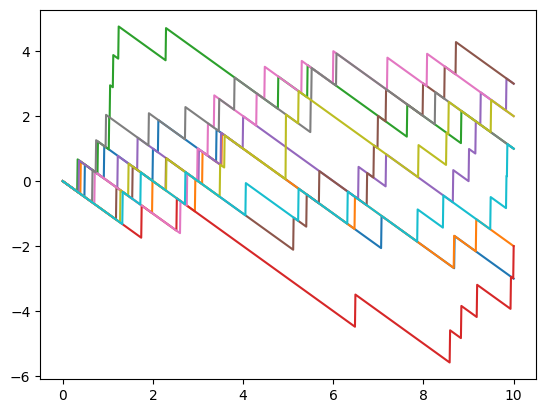

In [44]:
for i in range(10):
    time, martingale= martingale3(0,10,0.01)
    plt.plot(time,martingale)

### **Chapter 3**

Use the definition of Brownian motion in Proposition 3.1 to construct a function def in Python that takes as inputs the time interval and the step size and yields as an output a Brownian path

In [9]:
def brownian(t_initial, t_final, step_size):
    # time array
    time = np.arange(t_initial, t_final+step_size, step_size)

    # number of points (without B0)
    n = len(time) - 1

    # initialize n Gaussian random variables with mean 0 and variance dt
    # each of the elements in the array represents B_tj - B_(tj-1)
    dB = np.random.normal(0,step_size,n)

    gaussian_vector = np.concatenate(([0],np.cumsum(dB)))
    
    return time, gaussian_vector

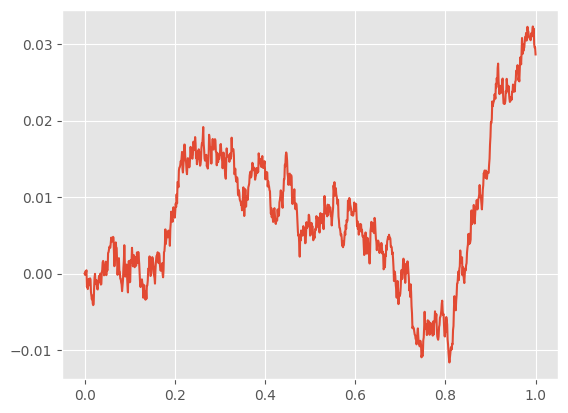

In [28]:
time, gaussian_vector = brownian(0,1,0.001)

from matplotlib import style
  
with plt.style.context('ggplot'):
    plt.plot(time,gaussian_vector)
  
plt.show()

### **Chapter 2**

##### **2.5. Simulating the Brownian bridge**

In [2]:
from numpy.linalg import cholesky

Brownian bridge adalah proses Gauss $(Z_t, t \in [0,1])$ yang didefinisikan berdasarkan nilai rataannya $E[Z_t]=0$ dan kovariansi $Cov(Z_t,Z_s)=s(1-t)$ jika $s\le t$, serta $Z_0=Z_1=0$.

In [3]:
def brownian_bridge_first(t_initial, t_final, step_size):
    # time array
    time = np.arange(t_initial, t_final+step_size, step_size)
    
    # number of points, except for X0 and X1 to prevent a degenerate covariance matrix
    n = len(time) - 2 
         
    # create covariance matrix
    C = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            C[i,j] = (min(i,j)+1)/100*(1-(max(i,j)+1)/100)
    
    A = cholesky(C)

    # generate n standard Gaussian random variables
    standard_gaussian = np.random.normal(0,1,n)

    # create the brownian bridge by X=AZ
    brownian_bridge = np.matmul(A,standard_gaussian)

    # add X0=0 and X1=0
    brownian_bridge = np.concatenate(([0],brownian_bridge,[0]))

    return time, brownian_bridge

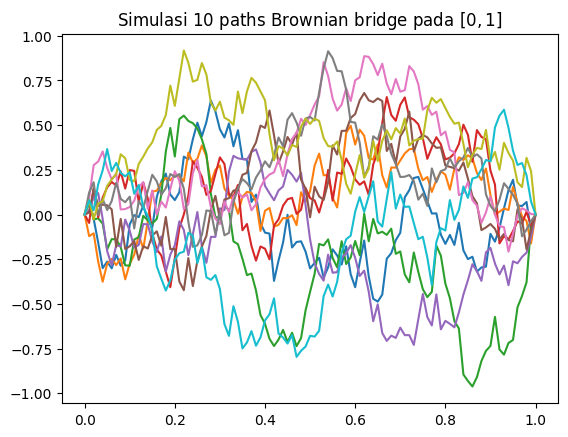

In [4]:
for i in range(10):
    time, brownian_bridge = brownian_bridge_first(0,1,0.01)
    plt.plot(time,brownian_bridge)

plt.title('Simulasi 10 paths Brownian bridge pada $[0,1]$')
plt.show()

Jika $(B_t, t\in [0,1])$ adalah gerak Brown standard, maka proses berikut
$$Z_t= B_t - t B_1, \quad t\in [0,1]$$
adalah suatu Brownian bridge.

In [5]:
# function to create a standard Brownian motion

def brownian_standard(t_initial, t_final, step_size):
    # time array
    time = np.arange(t_initial, t_final+step_size, step_size)
    
    # number of points, except for B0=0
    n = len(time) - 1
         
    # create covariance matrix
    C = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            C[i,j] = (min(i,j)+1)/100
    
    A = cholesky(C)

    # generate n standard Gaussian random variables
    standard_gaussian = np.random.normal(0,1,n)

    # create the standard brownian motion array by B=AZ
    standard_brownian = np.matmul(A,standard_gaussian)

    # add B0=0 to the array
    standard_brownian = np.concatenate(([0],standard_brownian))

    return time, standard_brownian

In [6]:
def brownian_bridge_second(t_initial, t_final, step_size):
    
    time, standard_brownian = brownian_standard(t_initial, t_final, step_size)
    
    # number of points
    n = len(time)

    brownian_bridge = np.zeros(n)
    for i in range(n):
        brownian_bridge[i] = standard_brownian[i] - time[i]*standard_brownian[-1]
    
    return time, brownian_bridge

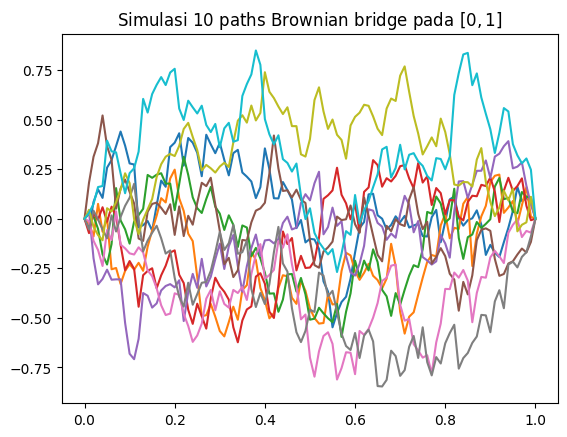

In [7]:
for i in range(10):
    time, brownian_bridge = brownian_bridge_second(0,1,0.01)
    plt.plot(time,brownian_bridge)

plt.title('Simulasi 10 paths Brownian bridge pada $[0,1]$')
plt.show()

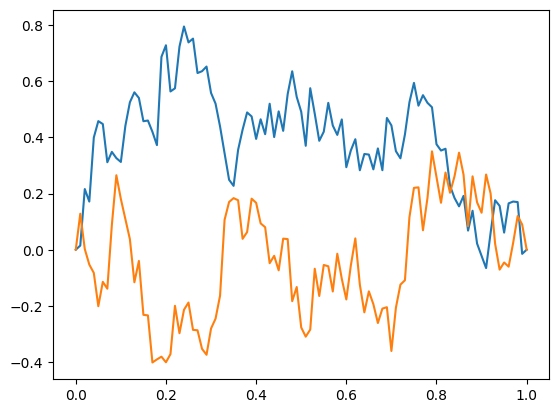

In [8]:
# Simulate a single path of brownian bridge using the two methods
np.random.seed(120)

# first method
time, brownian_bridge = brownian_bridge_first(0,1,0.01)
plt.plot(time,brownian_bridge)

# second method
time, brownian_bridge = brownian_bridge_second(0,1,0.01)
plt.plot(time,brownian_bridge)

plt.show()


##### **2.1. The Box-Mueller method**

In [37]:
from scipy.stats import norm

In [34]:
# a) generate 10000 sample of (Z1,Z2) using Box-Mueller method
U1 = np.random.uniform(0,1,10000)
U2 = np.random.uniform(0,1,10000)
Z1 = np.zeros(10000)
Z2 = np.zeros(10000)

for i in range(len(Z1)):
    A = np.sqrt(-2 * np.log(U1[i]))
    B = 2 * np.pi * U2[i]
    Z1[i] = A * np.cos(B)
    Z2[i] = A * np.sin(B)

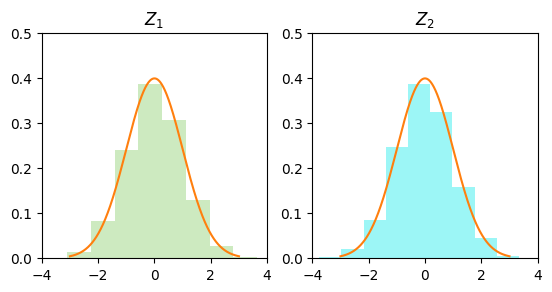

In [35]:
# b) plotting 
fig,(ax1,ax2) = plt.subplots(1,2,subplot_kw=dict (box_aspect=1))
x = np.arange(-3, 3, 0.001)

ax1.hist(Z1, facecolor = "#cdeac0", density=True)
ax1.set_title("$Z_1$")
ax1.set_xlim([-4, 4])
ax1.set_ylim([0, 0.5])
ax1.plot(x, norm.pdf(x, 0, 1))

ax2.hist(Z2, facecolor = "#9cf6f6", density=True)
ax2.set_title("$Z_2$")
ax2.set_xlim([-4, 4])
ax2.set_ylim([0, 0.5])
ax2.plot(x, norm.pdf(x, 0, 1))

plt.show()


In [36]:
# c) Covariance of Z1,Z2
covariance = sum(Z1 * Z2)/10000
covariance

0.005956472377594918

### **Chapter 1**

**1.1. Uniform random variables**

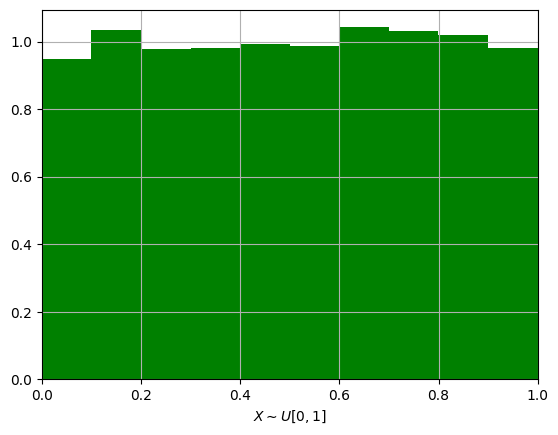

In [2]:
# a) create an array of N random numbers (uniformly distributed on [0,1])
N = 10000
uniform_data = np.random.uniform(0,1,N) 

# b) create histogram
num_bins = 10
plt.hist(uniform_data, bins=num_bins, facecolor = "green", density=True)
plt.xlim([0,1])
plt.xlabel('$X \sim U[0,1]$')
plt.grid(True)

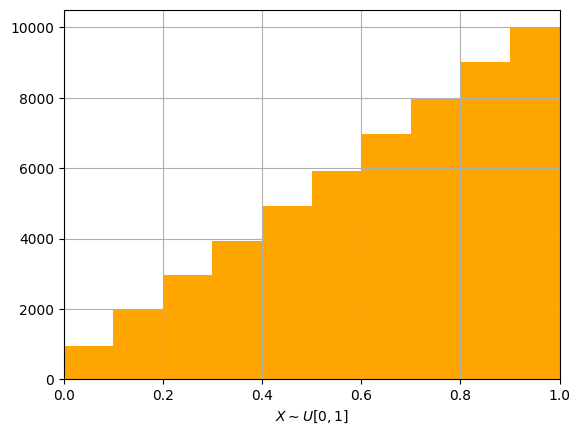

In [4]:
# c) cumulative histogram
plt.hist(uniform_data, bins=num_bins, range=(0,1), facecolor = "orange", cumulative=True)
plt.xlim([0,1])
plt.xlabel('$X \sim U[0,1]$')
plt.grid(True)

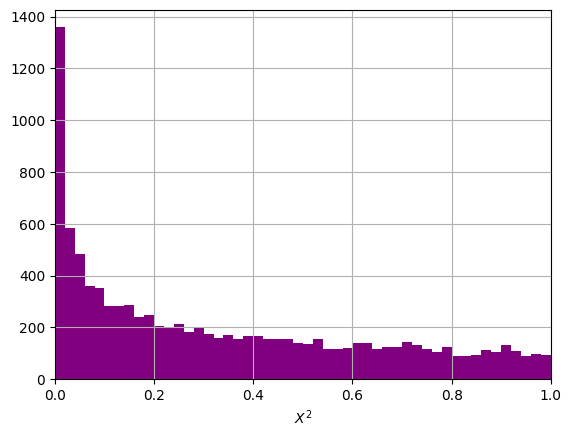

In [20]:
# d) histogram for X^2
squared_data = [data**2 for data in uniform_data]
plt.hist(squared_data, bins=num_bins, range=(0,1), facecolor = "purple")
plt.xlim([0,1])
plt.xlabel('$X^2$')
plt.grid(True)

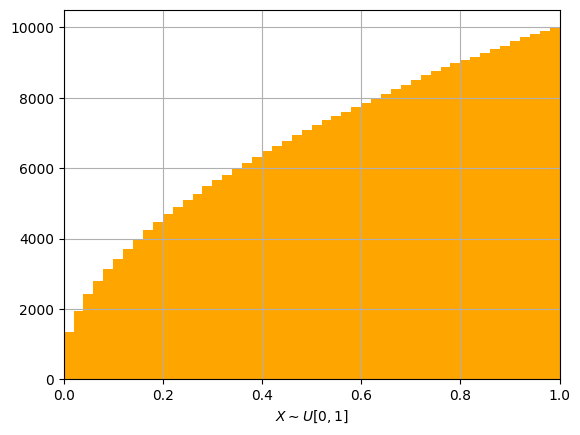

In [21]:
# c) cumulative histogram for X^2
plt.hist(squared_data, bins=num_bins, range=(0,1), facecolor = "orange", cumulative=True)
plt.xlim([0,1])
plt.xlabel('$X \sim U[0,1]$')
plt.grid(True)